In [1]:
import os
import sys
from pathlib import Path

import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
trajlogpath = r'/home/mengcz/movsim/ringroad_2lanes.traj.route_main.csv'
trajdf = pd.read_csv(trajlogpath, header=None, comment='#')

In [3]:
trace = trajdf[trajdf[8] == 1]
trace

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,1,996.5,20.5244,0.39801,49.12,0.703355,FAST_TYPE,1,1,1,1970-01-01T00:00:01Z,996.5477,
104,2.0,1,17.3,20.8716,0.31239,48.17,1.186763,FAST_TYPE,1,1,1,1970-01-01T00:00:02Z,17.2526,
173,3.0,1,38.3,21.1295,0.22090,46.78,1.570149,FAST_TYPE,1,1,1,1970-01-01T00:00:03Z,38.2605,
241,4.0,1,59.5,21.2943,0.12751,45.07,1.851848,FAST_TYPE,1,1,1,1970-01-01T00:00:04Z,59.4798,
310,5.0,1,80.8,21.3668,0.03637,43.11,2.036643,FAST_TYPE,1,1,1,1970-01-01T00:00:05Z,80.8176,
379,6.0,1,102.2,21.3512,-0.04934,41.02,2.137064,FAST_TYPE,1,1,1,1970-01-01T00:00:06Z,102.1834,
447,7.0,1,123.5,21.2538,-0.12861,38.86,2.172873,FAST_TYPE,1,1,1,1970-01-01T00:00:07Z,123.4923,
516,8.0,1,144.7,21.0802,-0.20323,36.69,2.168156,FAST_TYPE,1,1,1,1970-01-01T00:00:08Z,144.6652,
585,9.0,1,165.6,20.8326,-0.27740,34.53,2.145942,FAST_TYPE,1,1,1,1970-01-01T00:00:09Z,165.6276,
655,10.0,1,186.3,20.5088,-0.35566,32.40,2.121222,FAST_TYPE,1,1,1,1970-01-01T00:00:10Z,186.3046,


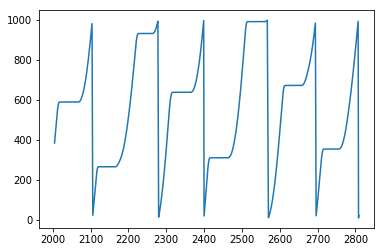

In [7]:
plt.plot(trace[0][2000:2800], trace[2][2000:2800])